# Homework 2
Complete the exercises working in your group. You may share the notebook with your group members using the share button in the upper right. Be careful with this feature. Although similar to Google Docs in functionality, you will notice that if two people are working on the same cell at the same time, then you may lose your work in that cell.

**Group Member: Angela Liu, Angelina Ying, Kristen Li, Louis Lu, Winci Liang**

In [ ]:
import requests
import getpass
import os
import spacy
import numpy as np
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting and visualization
import seaborn as sns # my personal favorite visualization library

# Question 1
## API practice
Using the New York Times API, answer the following questions.
1. What book is number n on the bestseller list where n is your group number? (Use code to obtain and show code)
2. What does the cover look like? Use code to obtain a picture of it using the API. Include a picture here using markdown.
3. How much is it on Amazon? (Use code to obtain and show code)
4. How long was it on the bestseller list for? (Use code to obtain and show code)



### Part 1: What book is number n on the bestseller list where n is your group number?

Answer: The number 2 book on the Hard-cover Fiction Bestseller List is *Holly.*


To access the New York Times API, we first send an API request, appending the APIKEY variable to the base URL for the New York Times Books API. This is how we authenticate and authorize the API request with our own API key.

We then checks the HTTP status code to ensure that the request was successful (status_code == 200), and if it was successful, it parses and prints the names of all the available lists from the JSON response.

Out of all the bestseller lists in the NYT API, we choose the "hardcover fiction" endpoint for the current bestsellers, which is also the default in the NYT API. We then extract the book that is number 2 (index 1) on that list from the JSON response since we are group 2. Finally, we print the name of the title of the book, which was called "Holly."

In [ ]:
APIKEY = getpass.getpass()
# Password: yqzkEDIUmAppO6QgWo9l1VL7fkkZOoGj

··········


In [ ]:
# get name of all the lists
url = f"https://api.nytimes.com/svc/books/v3/lists/names.json?api-key={APIKEY}"
response = requests.get(url)
print(f"Status code {response.status_code}")
# view the name of all the lists
# response.json()

Status code 200


In [ ]:
# get science list
url = f"https://api.nytimes.com/svc/books/v3/lists/current/hardcover-fiction.json?api-key={APIKEY}"
response = requests.get(url)
response.status_code

200

In [ ]:
fiction_list = response.json()
fiction_list["results"]["books"][1]['title']

'HOLLY'

### Part 2: What does the cover look like? Use code to obtain a picture of it using the API. Include a picture here using markdown.

Answer printed below.

To print the book cover of "Holly," we first access the book cover from the hard-cover fiction list by accessing the "book_image" key within the dictionary representing the second book. We then display the book cover image in the markdown with "![Book Cover]," followed by the retrieved URL.

In [ ]:
book_cover_url = fiction_list["results"]["books"][1]["book_image"]
book_cover_url

'https://storage.googleapis.com/du-prd/books/images/9781668016138.jpg'

![Book Cover](https://storage.googleapis.com/du-prd/books/images/9781668016138.jpg)


### Part 3: How much is it on Amazon?


Answer: The number two bestseller book on the hard-cover fiction list now sells for [$17.99 on Amazon](https://www.amazon.com/dp/1668016133?tag=NYTBSREV-20).

To find the price on Amazon, we retrieve the Amazon product URL by accessing the `amazon_product_url` key within the dictionary representing the second book on the `fiction_list`.

In [ ]:
fiction_list["results"]["books"][1]['amazon_product_url']

'https://www.amazon.com/dp/1668016133?tag=NYTBSREV-20'

### Part 4: How long was it on the bestseller list for?

Answer: The book has been on the list for 3 weeks.

 To find out how long the book "Holly" by Stephen King was ranked second on the hard-cover fiction list, we accesses the `weeks_on_list` key within the dictionary representing the second book on the fiction list. This line of code retrieves the number of weeks that the book has been on the bestseller list.

In [ ]:
weeks = fiction_list["results"]["books"][1]['weeks_on_list']
print(f"The book has been on the list for {weeks} weeks.")

The book has been on the list for 3 weeks.


# Question 2
## Reading the classics
Among your group members, discuss the classics, e.g. books and authors found on Project Gutenberg, that you had read and loved, or hated. See Notebook 4 from the text for the link to this site as well as more details. Include your discussion in your notebook, along with pictures or links to the books to give the reader a sense of the books.

Create three (or more) metrics that could measure what it was that you loved or hated about the books. Code the metric as a Python function. Explain each metric, including why you think it is a useful or interesting way to measure a book. For instance, a count of unique words could be a metric to measure vocabulary. Average sentence length could be a measure of the author's style. The frequency and distribution of the length of words could provide insights into the use of 'big' words by the author.

Then, use `wget` to obtain the text of the books you discussed from Project Gutenberg, implement the metrics you created in Python, and analyze the books using these metrics.

Hypothesize what you expect to find in the books before the analysis, and then discuss what you actually found. As much as possible, narrate and explain the insights provided by your metrics when appropriate.  If you are unsure how to get started, begin with the code the textbook used to analyze War and Peace, make simple modifications to it, justifying at each step what effect you expect your modification to have, and the actual impact it did have. For instance, instead of looking at a count of unique words, look at the max or min of this count.  

## As we looked through the books listed Project Gutenberg, we are amazed by how many books can be accessed on there, including some of our favoriate books. However,  there are still a lot of good books not in the database such as "Harry Potter", "Animal Farm", "1984"... Some of our favoriate books that are included are:
##"[Alice's Adventures in Wonderland](https://www.gutenberg.org/ebooks/11)" by Lewis Carroll
"The Alice in Wonderland Movie has been my favoriate during childhood. When I grew older, I have finally read the book version and fell in love with the book as well. I found it very similar to the movie but a lot more detailed. Every time thinking about the book or seeing image of the character "Alice", it reminds me of my childhood memories." -- Angela
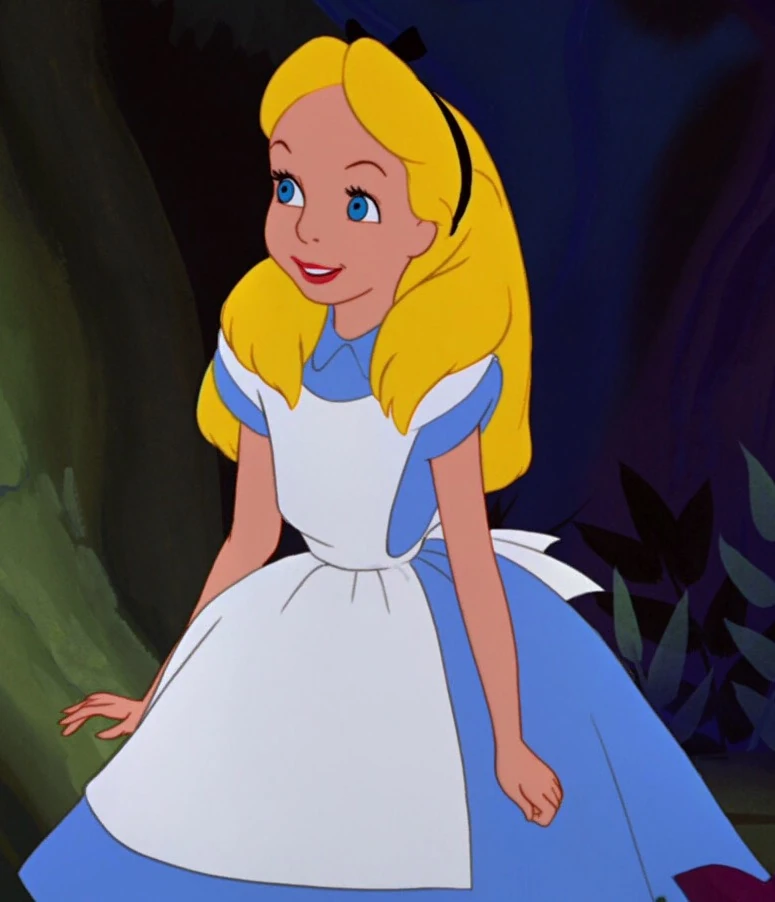



## "[The Picture of Dorian Gray](https://www.gutenberg.org/ebooks/174)" by Oscar Wilde
"You will never be disappointed by Oscar Wilde's imagination and the ingieneous use of satarism in the literature. Depicting the common human sins of tempatations and eager for youth, Wilde criticizes about the entire humanity through the lenses of Dorain Grey's life. " -- Angelina
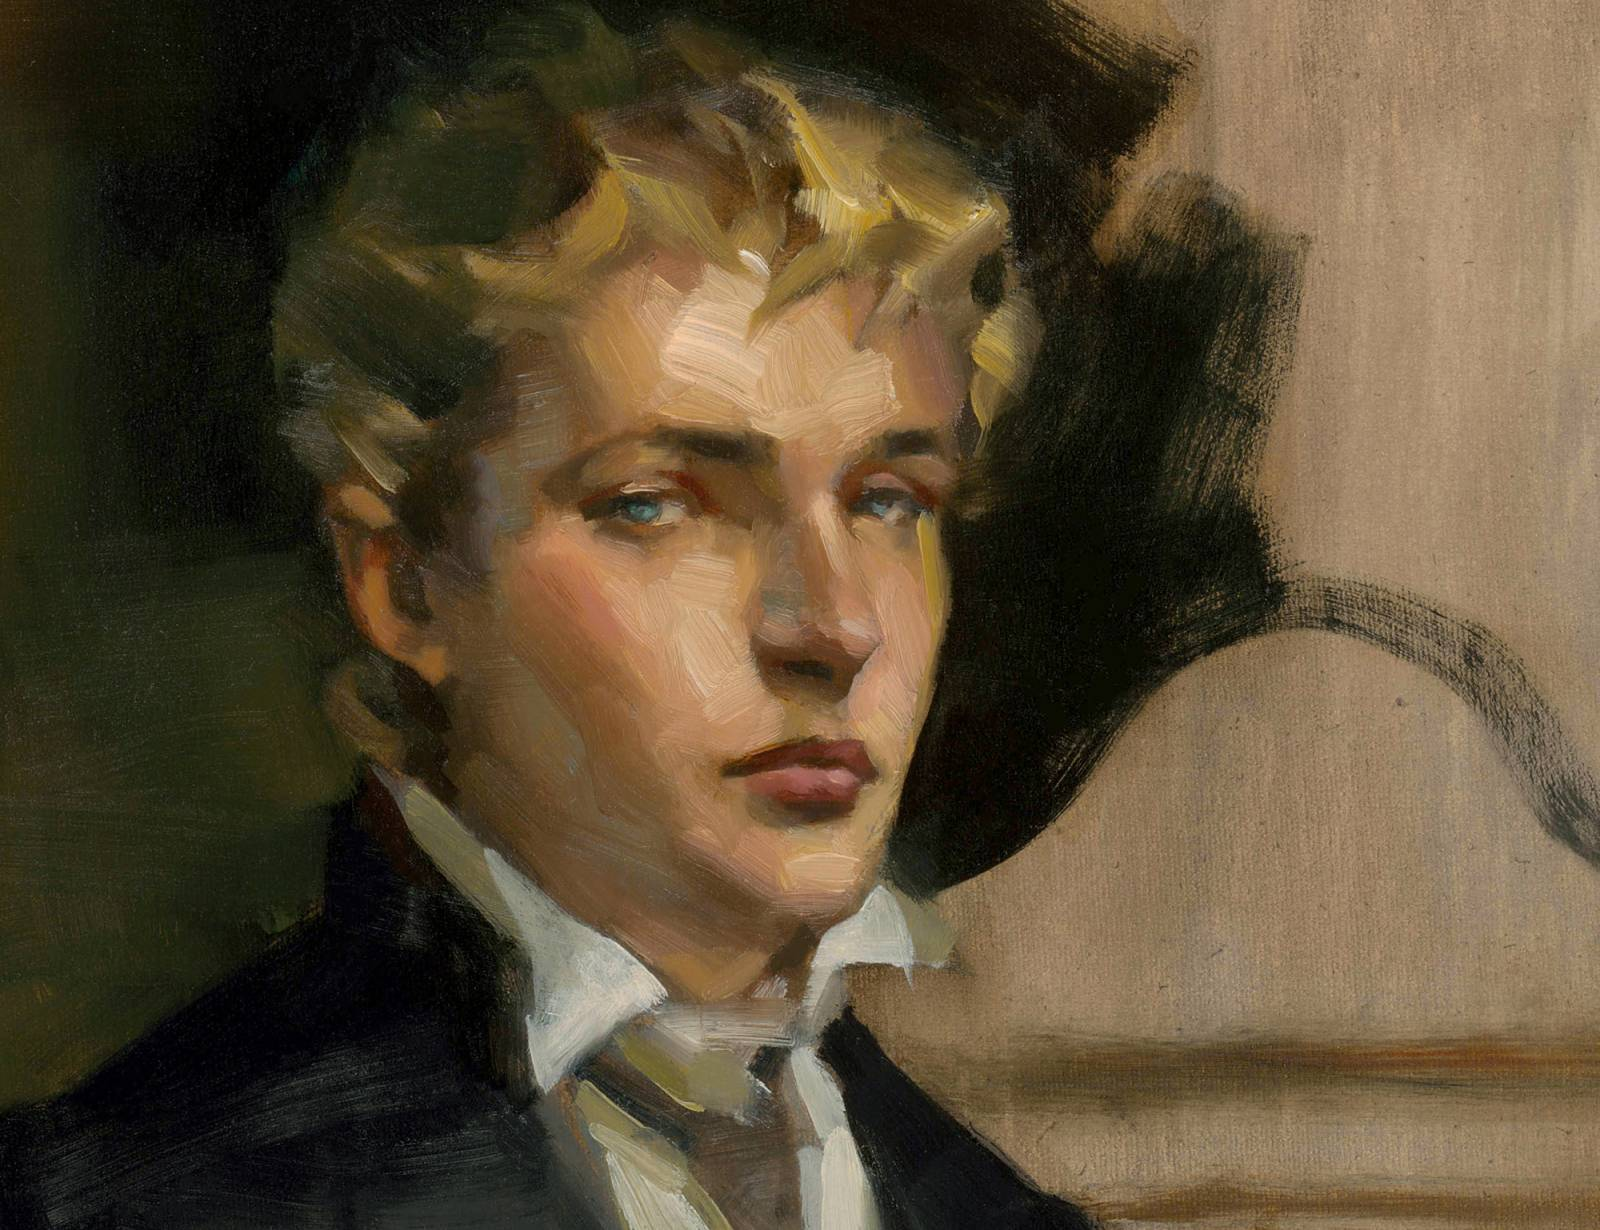

## "[Peter Pan](https://www.gutenberg.org/ebooks/16)" by J. M. Barrie
" This is the first book I have ever read in full in English and it was a fantastic one. Having read it in the age when I still believed I have superpowers, I really thought I could fly like Peter Pan!"
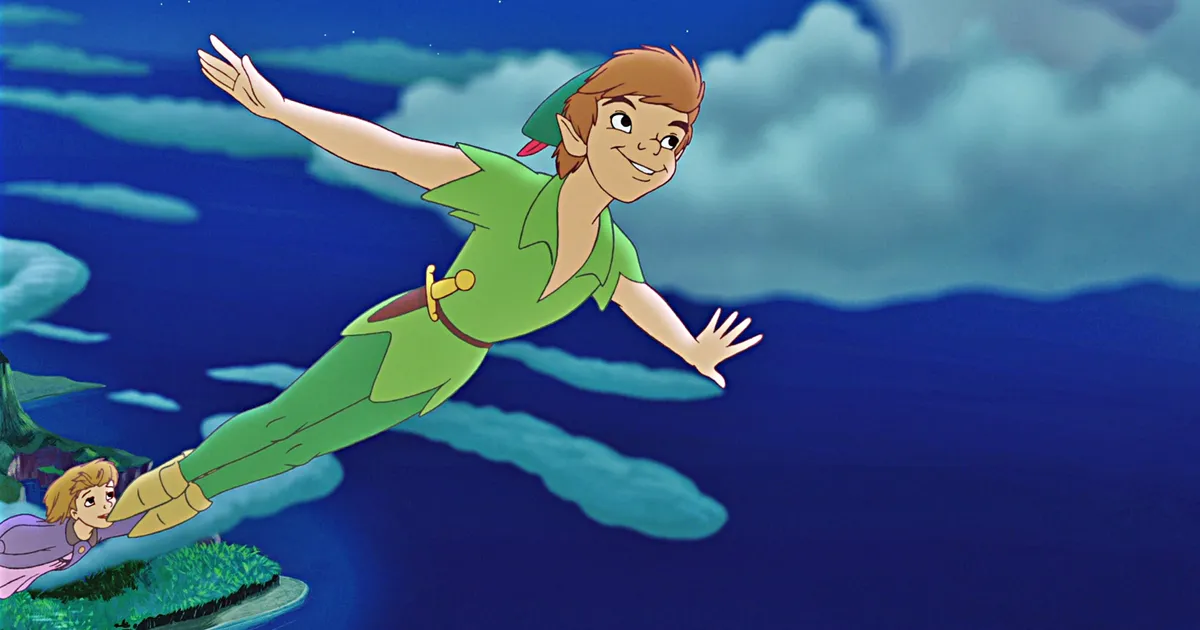


### "[Pride and Prejudice](https://www.gutenberg.org/ebooks/1342)" by Jane Austen
Our group had a split view on this book. A couple people really enjoyed the author's depict of the main conflict of the story yet another half of our group said there reading experience was not necessarily an enjoyable one because the protagonist Mrs. Bennet is such an annoying character!


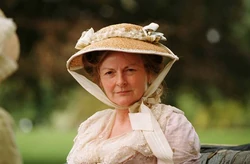


### Metrics
**Type token ratio:** In natural language processing, type number means the unique number of words and the number of tokens means the number of all the words. By calculating the type token ratio (TTR), we can evaluate the vocabulary richness of the document. The higher TTR is, the richer the language is.

**Average sentence length:** The average sentence length is a good indicator of author's style and the readbility of the book.

**Average word length:** This metric is straightforward. It is the average length of the words. It's also a measure of the readbility of a corpus.

## In the code below, we will explore the book "Pride and Prejudice."

Before conducting the analysis, we expect high numbers in all metrics from our prior knowledge that the book is known for its eloquent language, complex syntax structures, and engaging readability.

To find out its performances over the metrics, we first get the book Pride and Prejudice from the website and read it into a Python variable called 'text.' We then define a metric called 'TTR' to calculate and print the number of unique words in a given text and the type-to-token ratio. The second and third metrics measure the average sentence length and the average word length, respectively. Both metrics are defined sing the spaCy NLP pipeline.

After applying the metrics to the book "Pride and Prejudice," we get that the number of unique words is 7921, the type to token ratio is 0.047, the average word length is 3.75, and the average sentence length is 28.36.

Based on the results, we can conclude that the book "Pride and Prejudice" overall echoes our expectation that it is more likely to appeal to readers who prefer a more descriptive and complex writing style. The high number of unique words (7,921) suggests that the book exhibits a rich and diverse vocabulary. This can indicate that the author, Jane Austen, used a wide range of words and expressions to convey her ideas and describe scenes, characters, and emotions.  The average word length (3.75) and the average sentence length (28.36) suggest that the book contains relatively long sentences on average. Longer sentences can contribute to a more descriptive and complex writing style, which may require readers to pay closer attention to comprehension. Nonetheless, one surprising insight is from the Type-to-Token Ratio (TTR) of 0.047. which indicates a relatively low TTR. We expected the book to have a high TTR because of it has rich and diverse vocabulary, but the relatively low TTR derived suggests that the book tends to reuse words, phrases, or expressions.

In [ ]:
# get the book Pride and Prejudice from the website and read it
!wget -O pride.txt 'https://www.gutenberg.org/cache/epub/1342/pg1342.txt'
with open ('pride.txt') as fin:
  text = fin.read()

--2023-10-04 03:53:39--  https://www.gutenberg.org/cache/epub/1342/pg1342.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 772448 (754K) [text/plain]
Saving to: ‘pride.txt’

pride.txt           100%[===================>] 754.34K  --.-KB/s    in 0.1s    

2023-10-04 03:53:40 (5.76 MB/s) - ‘pride.txt’ saved [772448/772448]



The TTR function computes the type-to-token ratio (TTR) for a given text using the spacy library. It first tokenizes the text, then calculates the number of unique words (types) and divides this by the total number of words (tokens) to compute the TTR. The function then prints the number of unique words and the computed TTR value

In [ ]:
# Type to token ratio
def TTR(text):
  nlp = spacy.load('en_core_web_sm', disable=['ner,parser'])
  tokens = nlp (text)
  unique_tokens = len(set(token.text for token in tokens))
  TTR = float(unique_tokens/len(tokens))
  print(f"The number of unique words is {unique_tokens}")
  print(f"The type to token ratio is {TTR}")

The avg_s_len function calculates the average sentence length for a given text using the spacy library. Similarly, ut first tokenizes the entire text to get the total number of tokens, and then identifies the total number of sentences in the text. The function then divides the total number of tokens by the number of sentences to compute the average sentence length and prints the result.

In [ ]:
# Average sentence length
def avg_s_len(text):
  nlp = spacy.load('en_core_web_sm', disable=['ner,parser'])
  tokens = nlp (text)
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(text)
  total_sentences = len(list(doc.sents))
  avg_len = len(tokens)/total_sentences
  print(f"The average sentence length is {avg_len}")

After tokenizing the text into individual words, it determines the length of each token. The function then computes the mean length of these tokens using NumPy and prints the result as the average word length.

In [ ]:
# Average word length
def avg_w_len(text):
  nlp = spacy.load('en_core_web_sm', disable=['ner,parser'])
  tokens = nlp (text)
  word_length = [len(token) for token in tokens]
  print(f"The average word length is {np.mean(word_length)}")

We use `TTR`, `avg_w_len`, `avg_s_len` to find out the number of unique words, type to token ratio, average word length, and average sentence length.

In [ ]:
TTR(text)
avg_w_len(text)
avg_s_len(text)

The number of unique words is 7921
The type to token ratio is 0.0471451613863213
The average word length is 3.7474719218155736
The average sentence length is 28.36141120864281


## In the code below, we will explore the book "Alice's Adventures in Wonderland."

To compare the results from the metrics applied to the book "Pride and Prejudice," we will apply the metrics and explore insights on the book "Alice's Adventures in Wonderland." Our group liked the book unanimously because it introduces readers to a wide range of inventive and whimsical words and phrases, employs a mix of short and long sentences, and is an enjoyable read with its relatively short proses. Therefore, we would expect large numbers for the TTR metric, which would indicate the book has a diverse and rich vocabulary. We would also expect small numbers for the average word length and sentence length, which would indicate a less complicated writing style and a simple and straightforward reading experience.

After applying the metrics to the book "Alice's Adventures in Wonderland," we get that the number of unique words is 3502, the type to token ratio is 0.084, the average word length is 3.31, and the average sentence length is 26.50.

Based on the results, we can conclude that the performance of the book "Alice's Adventures in Wonderland" in the three metrics aligns with our expectations. Compared to the results from the book "Pride and Prejudice," the number of unique words in "Alice's Adventures in Wonderland" is lower but while the TTR in the latter is higher than the former. The mixed results suggest that while "Pride and Prejudice" has a more rich and diverse vocabulary on absolute terms, the book "Alice's Adventures in Wonderland" is written with a wider range of vocabulary over less pages.

Comparatively, the book "Alice's Adventures in Wonderland" also have smaller averages of word length and sentence length, which suggest that the book has relatively short, manageable chapters.

In [ ]:
!wget -O alice.txt 'https://www.gutenberg.org/cache/epub/11/pg11.txt'
with open('alice.txt') as fin:
    text_alice = fin.read()

TTR(text_alice)
avg_w_len(text_alice)
avg_s_len(text_alice)

--2023-10-04 03:56:15--  https://www.gutenberg.org/cache/epub/11/pg11.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174392 (170K) [text/plain]
Saving to: ‘alice.txt’

alice.txt           100%[===================>] 170.30K  --.-KB/s    in 0.1s    

2023-10-04 03:56:15 (1.72 MB/s) - ‘alice.txt’ saved [174392/174392]

The number of unique words is 3502
The type to token ratio is 0.08438757560423142
The average word length is 3.305814597942119
The average sentence length is 26.5


## Question 3
### Open Datasets: Part I
Find an open dataset from the ones available at [AWS OpenData](https://aws.amazon.com/opendata/?wwps-cards.sort-by=item.additionalFields.sortDate&wwps-cards.sort-order=desc) that provides data that interests you.

Some of them will be hard to work with, so, I would like you to try working with whichever interest your group members and then explain in your solution here which open datasets you were interested in and why, which you tried to use but couldn't use, e.g. there may a data format which was too difficult to work with, limited tutorial, etc.

Note, you may need access to AWS resources in some of the tutorials. For those, you will need to use AWS SageMaker and other AWS tools via the AWS Console. I will be happy to meet with your group to assist you on this part.

In [ ]:
#Install AWS packages
! pip install awscli

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 128.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [ ]:
#Accessing the dataset through AWS CLI Access
! aws s3 ls --no-sign-request s3://intelinair-data-releases/longitudinal-nutrient-deficiency/

2021-03-05 21:50:31          0 
2023-03-02 09:55:31   11065819 Dadsetan_AAAI2021_LongitudinalNutrientDeficiency.pdf
2023-03-02 09:55:32      44315 Longitudinal Nutrient Deficiency Dataset Terms of Use 2021.pdf
2023-03-02 09:55:32 1907064673 Longitudinal_Nutrient_Deficiency.zip


In [ ]:
#Download the dataset
! aws s3 cp --no-sign-request s3://intelinair-data-releases/longitudinal-nutrient-deficiency/ . --recursive

download: s3://intelinair-data-releases/longitudinal-nutrient-deficiency/Longitudinal Nutrient Deficiency Dataset Terms of Use 2021.pdf to ./Longitudinal Nutrient Deficiency Dataset Terms of Use 2021.pdf
download: s3://intelinair-data-releases/longitudinal-nutrient-deficiency/Dadsetan_AAAI2021_LongitudinalNutrientDeficiency.pdf to ./Dadsetan_AAAI2021_LongitudinalNutrientDeficiency.pdf
download: s3://intelinair-data-releases/longitudinal-nutrient-deficiency/Longitudinal_Nutrient_Deficiency.zip to ./Longitudinal_Nutrient_Deficiency.zip


In [ ]:
#We want to first list the files in this directory and unzip them to see the data type
! ls

 Dadsetan_AAAI2021_LongitudinalNutrientDeficiency.pdf		   pride.txt
'Longitudinal Nutrient Deficiency Dataset Terms of Use 2021.pdf'   sample_data
 Longitudinal_Nutrient_Deficiency.zip


In [ ]:
! unzip Longitudinal_Nutrient_Deficiency.zip

Archive:  Longitudinal_Nutrient_Deficiency.zip
   creating: Longitudinal_Nutrient_Deficiency/
  inflating: __MACOSX/._Longitudinal_Nutrient_Deficiency  
   creating: Longitudinal_Nutrient_Deficiency/field_141/
   creating: Longitudinal_Nutrient_Deficiency/field_373/
   creating: Longitudinal_Nutrient_Deficiency/field_380/
   creating: Longitudinal_Nutrient_Deficiency/field_374/
   creating: Longitudinal_Nutrient_Deficiency/field_146/
   creating: Longitudinal_Nutrient_Deficiency/field_179/
   creating: Longitudinal_Nutrient_Deficiency/field_184/
   creating: Longitudinal_Nutrient_Deficiency/field_342/
   creating: Longitudinal_Nutrient_Deficiency/field_170/
   creating: Longitudinal_Nutrient_Deficiency/field_177/
   creating: Longitudinal_Nutrient_Deficiency/field_345/
   creating: Longitudinal_Nutrient_Deficiency/field_183/
   creating: Longitudinal_Nutrient_Deficiency/field_148/
   creating: Longitudinal_Nutrient_Deficiency/field_311/
   creating: Longitudinal_Nutrient_Deficiency/fie

This dataset is on langitudinal nutrient deficiency, however, it contains only  pictures, so it cannot be used.

In [ ]:
#Access and download another dataset - UCSC Genome Browser Sequence and Annotations
! aws s3 ls --no-sign-request s3://genome-browser/
! aws s3 cp --no-sign-request s3://genome-browser/ . --recursive

                           PRE cells/
                           PRE cgi-bin/
                           PRE gbdb/
                           PRE goldenPath/
                           PRE htdocs/
                           PRE logs/
                           PRE mysql/
2021-10-25 12:18:09       1465 temp.txt


In [ ]:
#Access and download another dataset - REDASA COVID-19 Open Data
! aws s3 ls --no-sign-request s3://pansurg-curation-raw-open-data/

In [ ]:
! aws s3 cp --no-sign-request s3://pansurg-curation-raw-open-data/ . --recursive

In [ ]:
! aws s3 ls --no-sign-request s3://pansurg-curation-raw-open-data/cord19/CORD19_20200424/upload_date=1587922596/

In [ ]:
! aws s3 cp --no-sign-request s3://pansurg-curation-raw-open-data/cord19/CORD19_20200424/upload_date=1587922596/ . --recursive

This dataset on Covid-19 is too large and all it has its text files, so it cannot be used.

In [ ]:
! aws s3 ls --no-sign-request s3://pre-post-purchase-questions/

In [ ]:
! aws s3 cp --no-sign-request s3://pre-post-purchase-questions/ . --recursive


After changing a couple dataset due to improper size and content, we end up with this dataset on [Pre and Post Purchase Questions](https://registry.opendata.aws/pre-post-purchase-questions/). This dataset include the product ids, product names, questions asked by customers under each product, and hour difference between purchase and question posting time. This dataset could provide insights into how the type of wording of the questions asked could influence the probability of making an acutual purchase, what is the ratio between pre-purchasing questions vs post-purchasing questions, how does asking questions impact the chances of purchasing/returning an item and how does time gap play a role in such impact.

## Question 4
### Open Dataset: Part II
After that walkthrough of the challenges of one or more datasets, proceed with choosing one that you want to work with. Then, prepare a walkthrough, similar to what I shared with you in the New York Times API notebook and the Python notebook, that show other students how to use the Open dataset you picked, what interesting data you can gather, and use them to answer a simple question. For instance, we answered the question of how many weeks a book stays on the bestseller list in the API notebook. You are encouraged to build upon the existing tutorials, but make sure to cite and link to any tutorials you use.


In [ ]:
#import packages
data = pd.read_csv('PrePostQuestions.csv') #reads the CSV file and converts it into a dataframe
data.head() #displays the first 5 rows of the dataframe

By reading the header of the dataset and the first five roles, we see there are 5 columns and a four examples of what inputs in each row look like.

In [ ]:
! cat README.txt

cat: README.txt: No such file or directory


The README.txt provided us details on the dimensions of the dataset and the content of each column.
###Question to be answered:
From exploring the dataset, we are interested in answering the question of what percentage of customer tend to post question after their purchase (for at lease 24 hoours) instead of before?


In [ ]:
ax = sns.countplot(x='label', data=data) #create the count plot of the 'label' column in the dataframe
for p in ax.patches: #iterates over each patch (bar) in the 'ax' object
    percentage = '{:.1f}%'.format(100 * p.get_height()/data['label'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
#calculates the percentage of the total count represented by the bar and annotate the bar with it
plt.show()

From our calculations and the graph, we see that 57.7% people post questions before purchase and 42.3% people post questions after purchase, according to the dataset values. This is different from what we expected -- we thought a lot more poeple would ask before purchase comparing to post-purchase.

# Question 5

## Distributions
In Notebook 8 from our textbook, we will be learning tools for working with distributions using Python.

Using these tools together with the data you have gathered in the previous questions (from 3 or 4), try to find numerical data that has a Zipf distribution.  You may use the code from the textbook as starter code.

If you find such a distribution, explain why you think it appears (e.g. it is common in social network data). If you do not see a Zipf distribution, explain which probability distribution it most closely resembles and plot. You do not need to find a Zipf distribution to get full credit on this question!

As always, take time to talk about and present the data and the plots you create, explaining each step along the way.

We would like to investigate the general distribution of time interval for people post question after purchase vs. before.

In [ ]:
plt.scatter(data['hours_diff'], data['label']) # create a scatter plot to view distribution

Takeaways from this graph: this graph doesn't seem to give us a Zipf distribution. We came to notice that the 'hour_diff' variable is highly correlated with the label of the comment. SO, we try to plot the hour diff based on different lable (pre or post), which is a categorical variable.

Here is the graph for the comment with 'pre' label, which basically means the consumer post the question before the purchase or within the 24 hours after purchase.

In [ ]:
g = sns.histplot(x=data[data['hours_diff']<0]['hours_diff'], binwidth=30)
g.set(xlim=(-500, 0))

This gives us the shape of distribution, but the diretion is wrong. Then, we try to change the direction of the x axis, so we can get a Zipf distribution.

In [ ]:
data['abs_hours_diff'] = data['hours_diff'].apply(abs)
g = sns.histplot(x=data[data['hours_diff']<0]['abs_hours_diff'], binwidth=30)
g.set(xlim=(0, 500))
plt.xlabel(' Hours before purchase')
plt.ylabel('Appreance Count')
plt.title('Hour diff for the Pre Posting Group');
plt.show()

We can see that converting the hour diff to its absolute value would give us a Zipf distribution for the comsumer who post questions before the purchase. More specifically, the appreance of questions is reversely proportional to the hour before purchase.

Now, we can plot the same graph for people post comments after the purcahse

In [ ]:
g = sns.histplot(x=data[data['hours_diff']>0]['hours_diff'], binwidth=200)
g.set(xlim=(0, 4000))

We can easily tell that for the data labled as post, there is also a Zipf distribution.  More specifically, the appreance of questions is reversely proportional to the hour after purchase. Combining the two trends together, the abolute value of time difference and questioin counts would give us a Zipf distribution.